# ЛР3

# Проверка статистических гипотез о виде закона распределения

In [1]:
from random import uniform
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Y(x):
    return 2 / (2 + x)

A = -1
B = 5

Теоритическая плотность распределения 

In [3]:
def f(x):
    if A <= x <= B:
        return 1 / (B - A)
    else:
        return 0

def g(y):
    return f(2 / y - 2) * (2 / y**2) 

Теоритическая функция распределения

In [4]:
def G(y):
    if y < 2 / 7:
        return 0
    elif y > 2:
        return 1
    else:
        return 1 / 3 * (-(1 / y) + 3.5)

## 1

## Критерий Пирсона

In [5]:
n = 200
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 4) for i in range(n)])
print(x_list)

[0.2893, 0.2899, 0.2902, 0.2905, 0.2913, 0.2918, 0.2932, 0.3016, 0.3017, 0.303, 0.303, 0.3036, 0.3047, 0.3058, 0.3065, 0.3071, 0.3103, 0.3108, 0.3108, 0.3117, 0.3117, 0.3128, 0.3145, 0.3147, 0.3164, 0.3172, 0.3248, 0.3255, 0.3268, 0.3281, 0.3306, 0.3319, 0.3336, 0.3344, 0.3372, 0.3375, 0.344, 0.3476, 0.3513, 0.3536, 0.3574, 0.358, 0.3589, 0.3605, 0.361, 0.3617, 0.3629, 0.3638, 0.3641, 0.3645, 0.3682, 0.3689, 0.371, 0.3726, 0.3777, 0.3815, 0.3938, 0.3994, 0.4023, 0.4048, 0.4054, 0.4058, 0.4086, 0.4174, 0.4179, 0.4191, 0.4204, 0.4235, 0.4311, 0.4325, 0.4348, 0.436, 0.4363, 0.4371, 0.4381, 0.4382, 0.4385, 0.439, 0.4446, 0.4466, 0.4479, 0.4483, 0.4488, 0.451, 0.4535, 0.4538, 0.4558, 0.4587, 0.463, 0.4645, 0.4685, 0.4694, 0.475, 0.4848, 0.4897, 0.4926, 0.4934, 0.5023, 0.5029, 0.5158, 0.5167, 0.5226, 0.5234, 0.5301, 0.5303, 0.5324, 0.5376, 0.5422, 0.5444, 0.5542, 0.5565, 0.5672, 0.5704, 0.5707, 0.5759, 0.583, 0.5938, 0.5997, 0.6031, 0.6071, 0.6074, 0.6174, 0.6184, 0.6245, 0.6322, 0.6325, 0.6

In [6]:
m = int(np.log2(n)) + 1
m

8

In [7]:
v = n // m
v

25

In [8]:
a = []
b = []
i = 0
for _ in range(m):
        a.append(x_list[i])
        b.append(x_list[i + v - 1])
        i += v - 1
intervals = [(i, j) for (i, j) in zip(a, b)]

h = [j - i for (i, j) in zip(a, b)]

f_star = [v / (n * i) for i in h]

wi = [0]
for i in range(m):
    wi.append(round(wi[i] + v / n, 4))
    
data = {
    'Ai': a,
    'Bi': b,
    'h': h,
    'f*': f_star,
    'w': wi[1:]
}
pd.DataFrame(data)

,Ai,Bi,h,f*,w
0,0.2893,0.3164,0.0271,4.612546,0.125
1,0.3164,0.3641,0.0477,2.620545,0.250
2,0.3641,0.4363,0.0722,1.731302,0.375
3,0.4363,0.4934,0.0571,2.189142,0.500
4,0.4934,0.6074,0.1140,1.096491,0.625
5,0.6074,0.7951,0.1877,0.665956,0.750
6,0.7951,1.1366,0.3415,0.366032,0.875
7,1.1366,1.6031,0.4665,0.267953,1.000


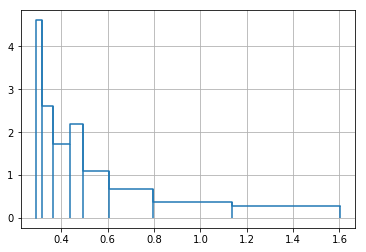

In [9]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.grid(True)
plt.show()

In [10]:
p_star = v / n
p_star

0.125

In [11]:
p = [G(b) - G(a) for a, b in intervals]
p

[0.09868772276659483,
 0.13801934770840996,
 0.15149909932526473,
 0.0884159251109991,
 0.12679720015765572,
 0.12955270248800943,
 0.12596214515532367,
 0.08534186463665061]

In [12]:
abs(1 - sum(p)) <= 0.01

False

In [13]:
chi_square = sum((v - n * pi)**2 / (n * pi) for pi in p)
chi_square

9.32757687415091

In [14]:
alpha = 0.01
k = m - 1
k

7

In [15]:
from scipy.stats import chi2
t_chi = chi2.isf(alpha, k)
t_chi

18.475306906582365

In [16]:
# за гипотезу принимаем f(x) = f0(x), где f0 плотность вероятности теоретического закона распределения
if t_chi > chi_square:
    print("Нет основнаний отклонять гипотезу")
else:
    print("Гипотизу следует оклонить")

Нет основнаний отклонять гипотезу


## 2

## Критерий Колмогорова

In [17]:
n = 30
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.29, 0.329, 0.332, 0.344, 0.347, 0.353, 0.38, 0.388, 0.407, 0.446, 0.451, 0.46, 0.46, 0.462, 0.47, 0.499, 0.534, 0.547, 0.551, 0.558, 0.697, 0.725, 0.796, 0.813, 0.979, 1.018, 1.097, 1.435, 1.444, 1.514]


In [18]:
counts = dict(Counter(x_list))
freq = [round(i / n, 3) for i in counts.values()]
ys = [0]
for k, i in enumerate(counts.values()):
    ys.append(ys[k] + i)
star_f = [round(i / n, 3) for i in ys]
print(star_f)

[0.0, 0.033, 0.067, 0.1, 0.133, 0.167, 0.2, 0.233, 0.267, 0.3, 0.333, 0.367, 0.433, 0.467, 0.5, 0.533, 0.567, 0.6, 0.633, 0.667, 0.7, 0.733, 0.767, 0.8, 0.833, 0.867, 0.9, 0.933, 0.967, 1.0]


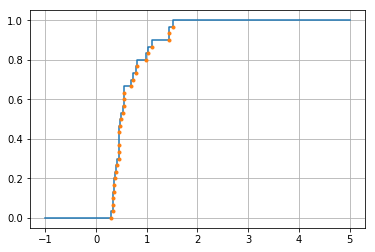

In [19]:
x_listt = sorted(list(set(x_list[:])))
x_listt.insert(0, -float('inf'))
x_listt.append(float('inf'))
x_plot = x_listt[1:-1]
y_plot = star_f[:]
x_plot.insert(0, A)
x_plot.append(B)
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

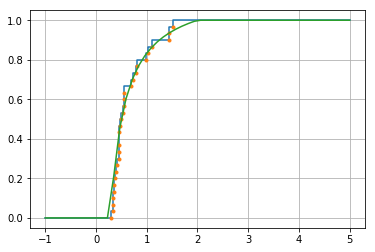

In [20]:
x_lin = np.linspace(min(x_plot), max(x_plot), 50)
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()

In [21]:
max_delta = round(max(abs(G(i) - j) for i, j in zip(x_list, star_f)), 2)
max_delta

0.12

In [22]:
e_lambda = round(np.sqrt(n) * max_delta, 2)
e_lambda

0.66

![table](kolmogorov.png)

In [23]:
# за гипотезу принимаем F(x) = F0(x), где F0 - теоретическая функция распределения
t_lambda = 1.60
if e_lambda > t_lambda:
    print("Гипотеза отклоняется")
else:
    print("Гипотеза принимается, но она может быть не верна")

Гипотеза принимается, но она может быть не верна


## 3

## Критерий Мизеса

In [24]:
n = 50
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.287, 0.287, 0.289, 0.306, 0.321, 0.325, 0.325, 0.329, 0.341, 0.349, 0.352, 0.362, 0.385, 0.39, 0.391, 0.395, 0.396, 0.396, 0.422, 0.443, 0.444, 0.445, 0.455, 0.459, 0.462, 0.464, 0.466, 0.482, 0.483, 0.495, 0.501, 0.528, 0.548, 0.574, 0.584, 0.708, 0.722, 0.755, 0.772, 0.778, 0.82, 1.065, 1.082, 1.198, 1.214, 1.256, 1.299, 1.586, 1.668, 1.741]


In [25]:
# alpha: n*omega^2
mizes_table = {
    0.2: 0.241,
    0.1: 0.347,
    0.05: 0.461,
    0.03: 0.548,
    0.02: 0.62,
    0.01: 0.744,
    0.001: 1.168
}

In [26]:
fn = [(i - 0.5) / n for i in range(1, len(x_list) + 1)]
print(fn)

[0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.97, 0.99]


In [27]:
n_omega_square = 1 / (12 * n) + sum((G(i) - fn[k])**2 for k, i in enumerate(x_list))
n_omega_square

0.10549204314298821

In [28]:
if n_omega_square < mizes_table[alpha]:
    print("Нет оснований отклонять гипотезу")
else:
    print("Гипотезу следует оклонить")

Нет оснований отклонять гипотезу
